### Visualizaciones: KPIs por Objetivo de Negocio
Se abordan cuatro objetivos de negocio clave:

1. Garantizar la Integridad Financiera  
2. Apoyar la Planificación Estratégica  
3. Fortalecer el Conocimiento de Clientes y Productos  
4. Permitir Reportes Transparentes y Defendibles

Cada uno se vincula con dimensiones de calidad como validez, unicidad, consistencia, completitud y trazabilidad.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('../data/clean/customer_data_clean.csv')
retail = pd.read_csv('../data/clean/retail_data_clean.csv')

print(customers.head())
print(retail.head())

   id         full_name                           email       phone  \
0   1          Kara Kim          kara.kim1924@yahoo.com  8046817662   
1   2   Kelly Peterson             unknown_2@domain.com  4677002147   
2   3     Henry Martin        henry.martin0365@mail.com  3786159326   
3   4     Walter Evans     walter.evans9757@hotmail.com  4068111412   
4   5  William Anderson  william.anderson8799@gmail.com  2602068340   

                                address signup_date    name  gender  age  
0   8971 Pine Ave, Greenville, TX 76366  2022-03-13   Elena  Female   60  
1      7619 Cedar Ln, Madison, CA 32004  2025-09-24     Bob  Female   50  
2     785 Elm St, Centerville, FL 70040  2025-09-24  Carlos    Male   36  
3    9383 Elm St, Springfield, TX 27467  2025-09-24   Diana  Female   64  
4  615 Sunset Blvd, Riverside, IL 02711  2025-09-24  George  Female   29  
   customer_id purchase_date product_category  amount  transaction_id
0          230    2025-05-11         Clothing  181.73

### Integridad Financiera

**Objetivo:** Validar que los montos reflejan ingresos reales.

**Visualización:**  
Se presenta un histograma de los montos de venta válidos para observar la distribución. Se incluye una línea vertical que indica la media. Esta visualización respalda la evaluación de la integridad financiera al confirmar que los datos reflejan ingresos confiables.

**KPI:**  
- Porcentaje de transacciones válidas.  
- Monto total de ventas limpias.


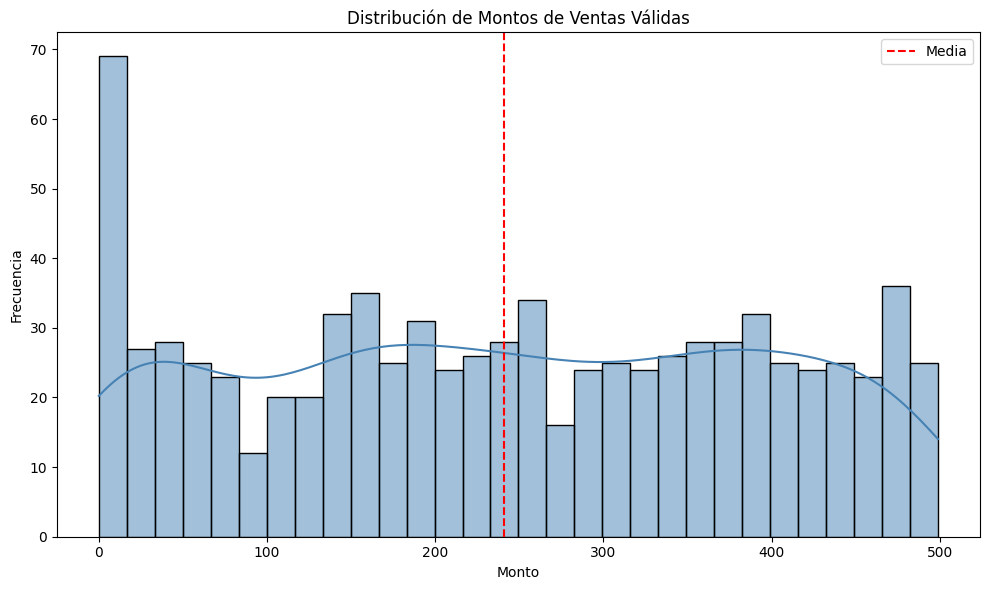

Transacciones válidas: 100.00%
Monto total de ventas limpias: $197,753.91


In [3]:
# Histograma de montos válidos
valid_sales = retail[retail['amount'] > 0]
plt.figure(figsize=(10,6))
sns.histplot(valid_sales['amount'], bins=30, kde=True, color='steelblue')
plt.axvline(valid_sales['amount'].mean(), color='red', linestyle='--', label='Media')
plt.title('Distribución de Montos de Ventas Válidas')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

# KPIs
total_transacciones = len(retail)
transacciones_validas = len(valid_sales)
porcentaje_validas = transacciones_validas / total_transacciones * 100
ventas_limpias = valid_sales['amount'].sum()

print(f"Transacciones válidas: {porcentaje_validas:.2f}%")
print(f"Monto total de ventas limpias: ${ventas_limpias:,.2f}")


### Planificación Estratégica con Tendencias Fiables

**Objetivo:** Analizar crecimiento mensual y estacionalidad.

**Visualización:**  
Se construye una serie temporal de ventas agregadas por mes, utilizando fechas estandarizadas. Esta visualización permite identificar patrones de crecimiento, estacionalidad y posibles anomalías temporales. Es clave para apoyar decisiones de inventario, promociones y proyecciones de demanda.

**KPI:**  
- Tasa de crecimiento mensual.  
- Mes con mayor volumen de ventas.


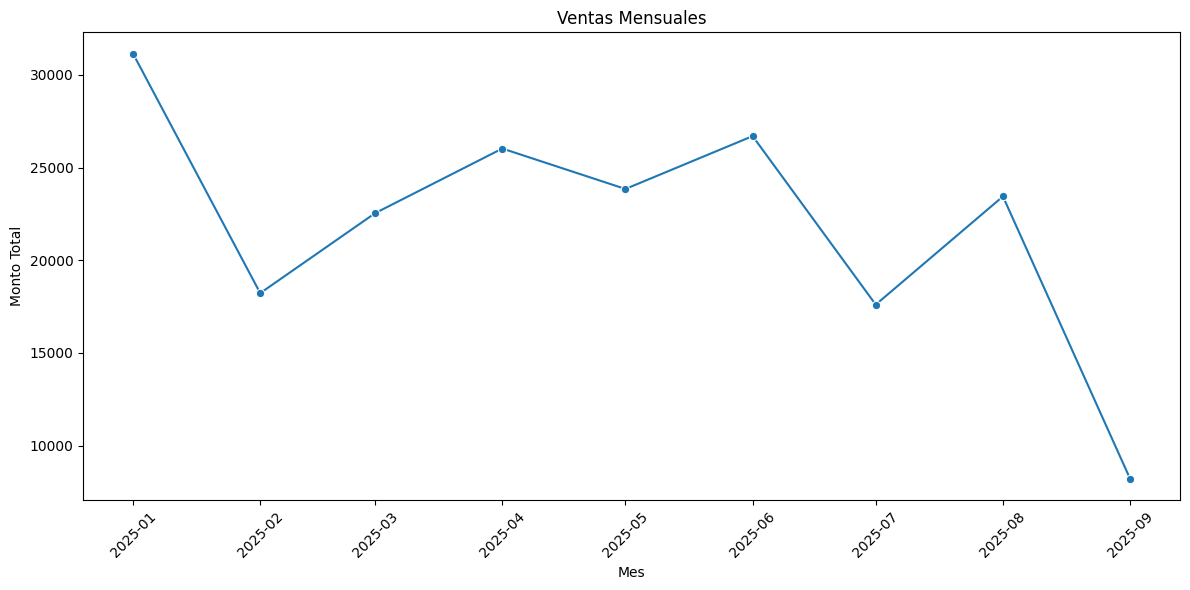

Tasa promedio de crecimiento mensual: -8.08%
Mes con mayor ventas: January 2025 ($31,151.19)


In [4]:
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])
ventas_mensuales = retail.groupby(retail['purchase_date'].dt.to_period('M'))['amount'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values, marker='o')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Monto Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KPIs
crecimiento_mensual = ventas_mensuales.pct_change().mean() * 100
mes_top = ventas_mensuales.idxmax().strftime('%B %Y')
ventas_top_mes = ventas_mensuales.max()

print(f"Tasa promedio de crecimiento mensual: {crecimiento_mensual:.2f}%")
print(f"Mes con mayor ventas: {mes_top} (${ventas_top_mes:,.2f})")



### Conocimiento de Clientes y Productos

**Objetivo:** Identificar segmentos valiosos y productos top.

**Visualización:**  
Se presenta un gráfico de barras horizontales con el total de ventas por categoría de producto. Además, se complementa con histogramas de edad y análisis por género (requiere integración entre datasets). Estas visualizaciones permiten segmentar clientes, personalizar campañas y reconocer productos de alto rendimiento.

**KPI:**  
- Producto más vendido.  
- Grupo de edad con mayor gasto.


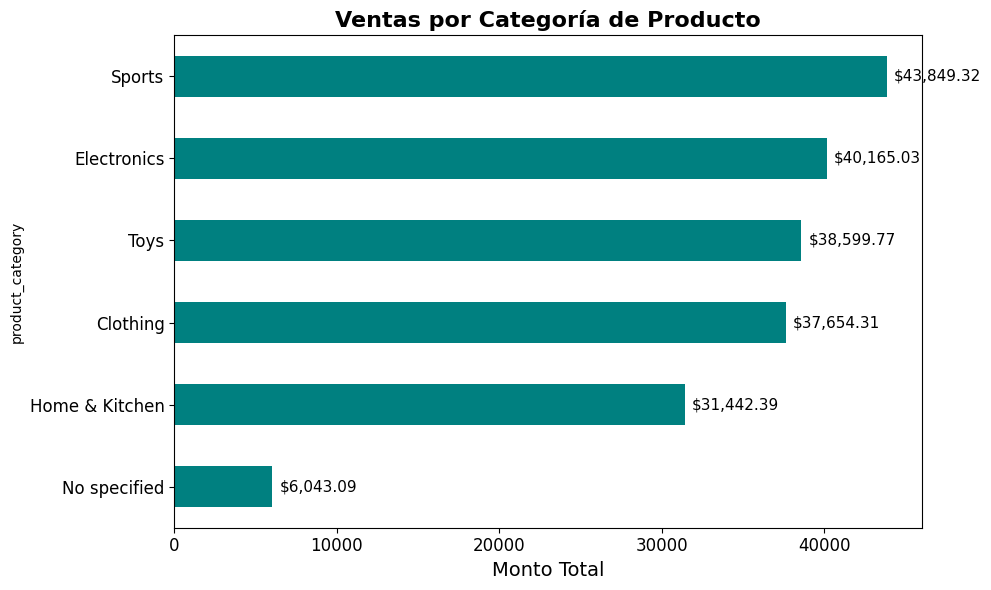

Categoría más vendida: Sports ($43,849.32)


In [5]:
# Agrupar y ordenar categorías por monto total
ventas_categoria = retail.groupby('product_category')['amount'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
ax = ventas_categoria.plot(kind='barh', color='teal')
plt.title('Ventas por Categoría de Producto', fontsize=16, fontweight='bold')
plt.xlabel('Monto Total', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de monto en cada barra
for i, v in enumerate(ventas_categoria):
    ax.text(v + ventas_categoria.max()*0.01, i, f"${v:,.2f}", va='center', fontsize=11)

plt.tight_layout()
plt.show()

# KPI: Categoría más vendida
categoria_top = ventas_categoria.idxmax()
monto_top = ventas_categoria.max()
print(f"Categoría más vendida: {categoria_top} (${monto_top:,.2f})")



Rango de edades: 18 - 100 años


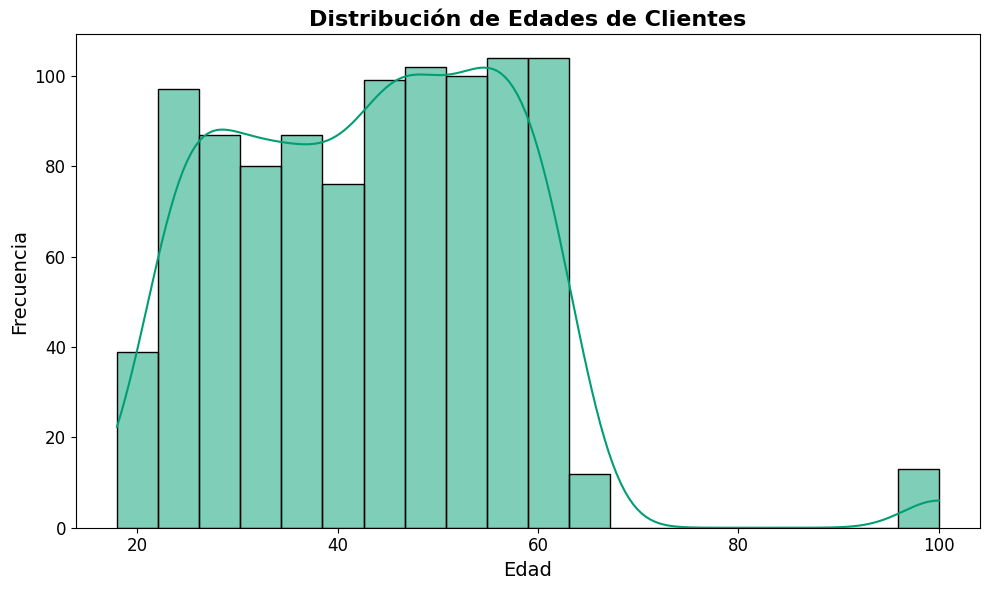

Edad promedio de clientes: 43.4 años


In [6]:
# Validar que no haya edades fuera de rango
edad_min, edad_max = customers['age'].min(), customers['age'].max()
print(f"Rango de edades: {edad_min} - {edad_max} años")

plt.figure(figsize=(10,6))
sns.histplot(customers['age'], bins=20, kde=True, color='#009E73', edgecolor='black')
plt.title('Distribución de Edades de Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# KPI: Edad promedio
edad_promedio = customers['age'].mean()
print(f"Edad promedio de clientes: {edad_promedio:.1f} años")


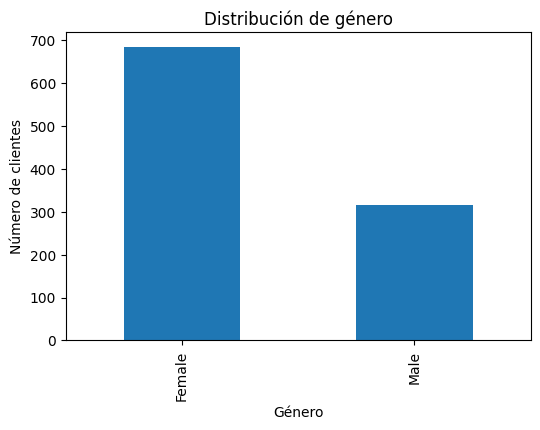

In [7]:
plt.figure(figsize=(6,4))
customers["gender"].value_counts().plot(kind="bar")
plt.title("Distribución de género")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.show()

In [8]:
customers['signup_date'] = pd.to_datetime(customers['signup_date'], errors='coerce')

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1000 non-null   int64         
 1   full_name    1000 non-null   object        
 2   email        1000 non-null   object        
 3   phone        1000 non-null   int64         
 4   address      1000 non-null   object        
 5   signup_date  1000 non-null   datetime64[ns]
 6   name         1000 non-null   object        
 7   gender       1000 non-null   object        
 8   age          1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB


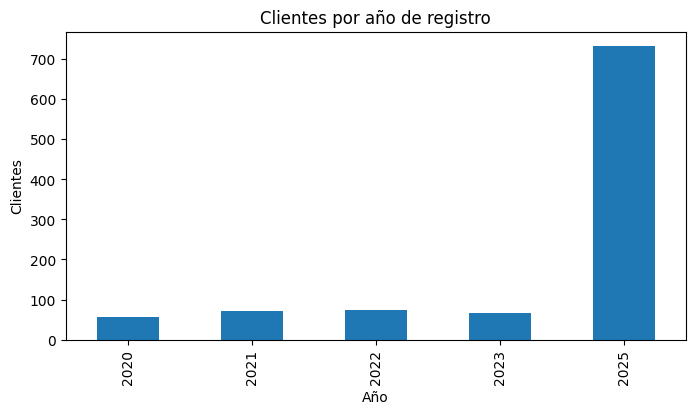

In [9]:
# --- Clientes por año de registro ---
customers["signup_year"] = customers["signup_date"].dt.year
plt.figure(figsize=(8,4))
customers["signup_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Clientes por año de registro")
plt.xlabel("Año")
plt.ylabel("Clientes")
plt.show()

/var/folders/mc/2gfzh5v563gcj4y_t_x5lrmc0000gn/T/ipykernel_4624/1991291786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values, palette='Set2')


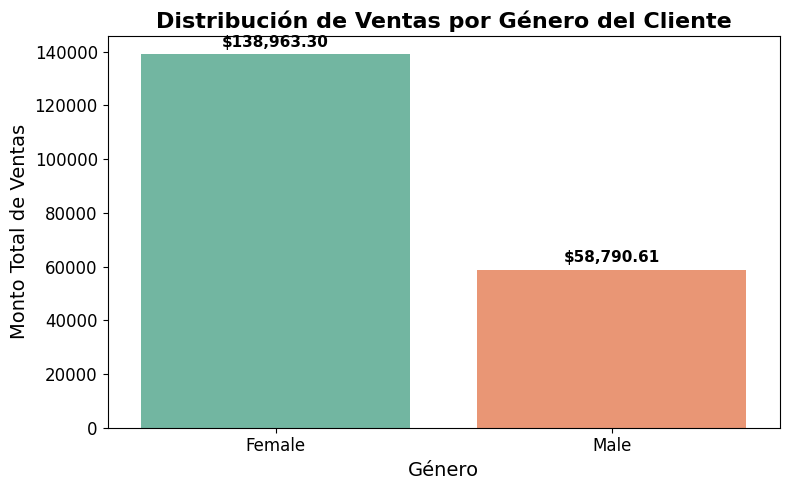

In [10]:
df_ventas = pd.merge(retail, customers[['id', 'gender']], left_on='customer_id', right_on='id', how='inner')

# Agrupar por género
ventas_por_genero = df_ventas.groupby('gender')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values, palette='Set2')
plt.title('Distribución de Ventas por Género del Cliente', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=14)
plt.ylabel('Monto Total de Ventas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(ventas_por_genero.values):
    ax.text(i, v + ventas_por_genero.max()*0.02, f"${v:,.2f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/mc/2gfzh5v563gcj4y_t_x5lrmc0000gn/T/ipykernel_4624/1035070747.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby("age_group")["amount"].sum().plot(kind="bar")


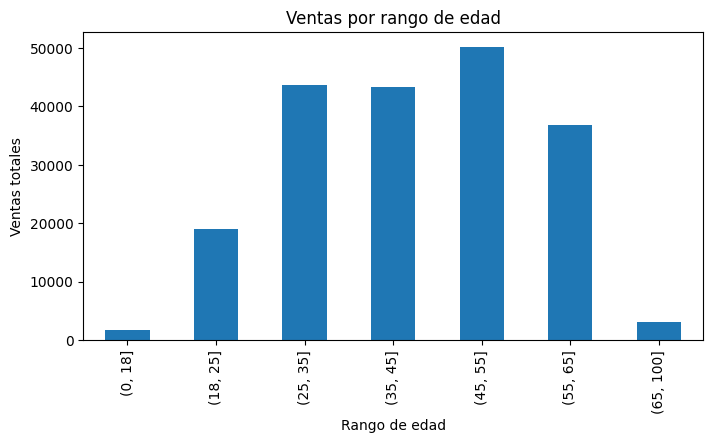

In [11]:
# --- Ventas por rango de edad ---
customers.rename(columns={"id":"customer_id"}, inplace=True)
merged = pd.merge(retail, customers, how="left", on="customer_id")
age_bins = [0,18,25,35,45,55,65,100]
merged["age_group"] = pd.cut(merged["age"], bins=age_bins)
plt.figure(figsize=(8,4))
merged.groupby("age_group")["amount"].sum().plot(kind="bar")
plt.title("Ventas por rango de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Ventas totales")
plt.show()